In [18]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense, Dropout
from keras.preprocessing.sequence import pad_sequences

In [19]:
# Load IMDB dataset
vocab_size = 5000
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=vocab_size)


In [20]:
# Pad sequences to the same length
maxlen = 200
X_train = pad_sequences(X_train, maxlen=maxlen)
X_test = pad_sequences(X_test, maxlen=maxlen)



In [21]:
# Build the model
model = Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=32, input_length=maxlen))
model.add(Flatten())
model.add(Dense(50, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(50, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(50, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [22]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [23]:
# Optional: Define a callback (like EarlyStopping or ModelCheckpoint)
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=2)


In [24]:
# Train the model with smaller batch size
results = model.fit(
    X_train, y_train,
    epochs=2,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[callback]
)

Epoch 1/2
196/196 ━━━━━━━━━━━━━━━━━━━━ 8s 29ms/step - accuracy: 0.5843 - loss: 0.6364 - val_accuracy: 0.8480 - val_loss: 0.3440
Epoch 2/2
196/196 ━━━━━━━━━━━━━━━━━━━━ 11s 31ms/step - accuracy: 0.9070 - loss: 0.2428 - val_accuracy: 0.8568 - val_loss: 0.3382


In [25]:
# Evaluate the model
score = model.evaluate(X_test, y_test, batch_size=500)
print("Test loss:", score[0])
print("Test accuracy:", score[1])
print("Mean Validation Accuracy:", np.mean(results.history['val_accuracy']))


50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.8536 - loss: 0.3426
Test loss: 0.3382200300693512
Test accuracy: 0.8568000197410583
Mean Validation Accuracy: 0.852400004863739


In [26]:
# Print a sample review and its label
print("Sample review (encoded):", X_train[0])
print("Sample label:", y_train[0])

Sample review (encoded): [   5   25  100   43  838  112   50  670    2    9   35  480  284    5
  150    4  172  112  167    2  336  385   39    4  172 4536 1111   17
  546   38   13  447    4  192   50   16    6  147 2025   19   14   22
    4 1920 4613  469    4   22   71   87   12   16   43  530   38   76
   15   13 1247    4   22   17  515   17   12   16  626   18    2    5
   62  386   12    8  316    8  106    5    4 2223    2   16  480   66
 3785   33    4  130   12   16   38  619    5   25  124   51   36  135
   48   25 1415   33    6   22   12  215   28   77   52    5   14  407
   16   82    2    8    4  107  117    2   15  256    4    2    7 3766
    5  723   36   71   43  530  476   26  400  317   46    7    4    2
 1029   13  104   88    4  381   15  297   98   32 2071   56   26  141
    6  194    2   18    4  226   22   21  134  476   26  480    5  144
   30    2   18   51   36   28  224   92   25  104    4  226   65   16
   38 1334   88   12   16  283    5   16 4472  113  

In [27]:
# Vocabulary lookup
vocab = imdb.get_word_index()
reverse_index = dict([(value, key) for (key, value) in vocab.items()])
decoded_review = " ".join([reverse_index.get(i - 3, "#") for i in X_train[0]])
print("Decoded review:", decoded_review)


Decoded review: and you could just imagine being there robert # is an amazing actor and now the same being director # father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for # and would recommend it to everyone to watch and the fly # was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also # to the two little # that played the # of norman and paul they were just brilliant children are often left out of the # list i think because the stars that play them all grown up are such a big # for the whole film but these children are amazing and should be # for what they have done don't you think the whole story was so lovely because it was true and was someone's life after all that was # with us all


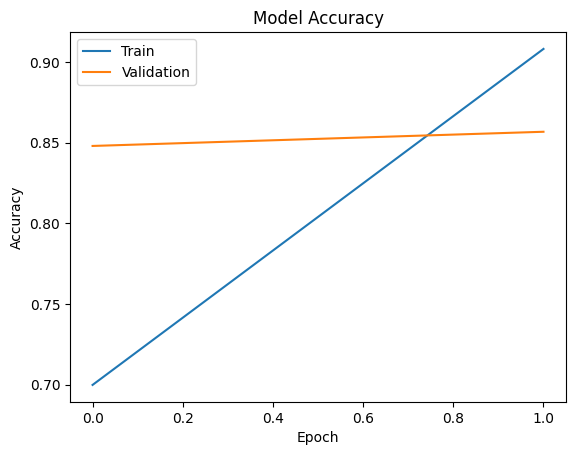

In [28]:
# Plot training accuracy
plt.plot(results.history['accuracy'])
plt.plot(results.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


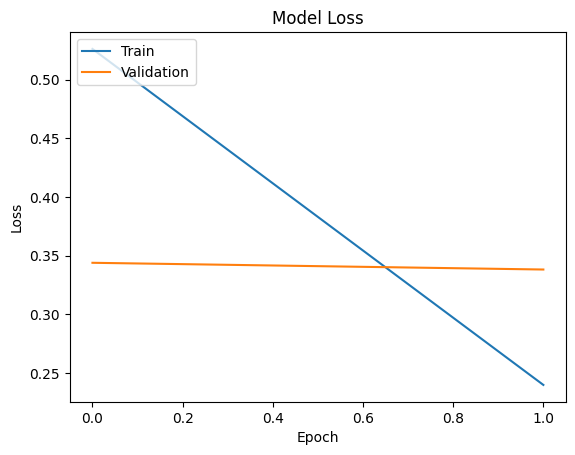

In [29]:
# Plot training loss
plt.plot(results.history['loss'])
plt.plot(results.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()